## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


b. Use the cell below to find the number of rows in the dataset.

In [4]:
no_rows = df.shape[0]
no_rows

294478

c. The number of unique users in the dataset.

In [5]:
no_uuser = df.user_id.nunique()
no_uuser

290584

d. The proportion of users converted.

In [6]:
no_user_converted = df.query('converted == 1').user_id.nunique()
no_user_converted/no_uuser

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
df.group.unique()

array(['control', 'treatment'], dtype=object)

In [8]:
df.landing_page.unique()

array(['old_page', 'new_page'], dtype=object)

In [9]:
df.converted.unique()

array([0, 1])

In [10]:
df_control_newpage = df.query('group == "treatment" and landing_page != "new_page"')
no_treatment_not_fitting_newpage = df_control_newpage.shape[0]
no_treatment_not_fitting_newpage

1965

In [11]:
df_control_oldpage = df.query('group == "control" and landing_page != "old_page"')
no_control_not_fitting_oldpage = df_control_oldpage.shape[0]
no_control_not_fitting_oldpage

1928

The Number of rows where group/landing_page are not fitting:

In [12]:
no_treatment_not_fitting_newpage + no_control_not_fitting_oldpage

3893

f. Do any of the rows have missing values?

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [14]:
df.isnull().sum().any

<bound method Series.any of user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64>

There are no missing values or null values.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [15]:
df2 = pd.DataFrame()
df2 = df2.append(df.query('group == "control" and landing_page == "old_page"'))
df2 = df2.append(df.query('group == "treatment" and landing_page == "new_page"'))
df2.shape

(290585, 5)

In [16]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [17]:
df2[((df2['group'] == 'control') == (df2['landing_page'] == 'old_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [18]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [19]:
df2[df2.user_id.duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [20]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [21]:
df_tmp = df2[df2.user_id == 773192]
df_tmp

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [22]:
df_tmp[df_tmp.timestamp == '2017-01-09 05:37:58.781806']

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [23]:
df2.drop(df_tmp[df_tmp.timestamp == '2017-01-09 05:37:58.781806'].index, inplace = True)

In [24]:
df2.shape

(290584, 5)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [25]:
df2_no_rows = df2.shape[0]
df2_no_rows

290584

In [26]:
df2_no_uuser = df2.user_id.nunique()
df2_no_uuser

290584

In [27]:
df2_no_user_converted = df2.query('converted == 1').user_id.nunique()
df2_no_user_converted

34753

The probability of an individual converting regardless of the page they receive is:

In [28]:
conversion_rate_df2 = df2_no_user_converted/df2_no_uuser
conversion_rate_df2

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [29]:
df2_control = df2.query('group == "control"')
df2_control_nouser = df2_control.user_id.nunique()
df2_control_nouser

145274

In [30]:
df2_control_converted = df2_control.query('converted == 1')
df2_control_no_converted = df2_control_converted.user_id.nunique()
df2_control_no_converted

17489

The probability an individual in the `control` group converts is:

In [31]:
conversion_rate_controllgroup = df2_control_no_converted/df2_control_nouser
conversion_rate_controllgroup

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [32]:
df2_treatment = df2.query('group == "treatment"')
df2_treatment_nouser = df2_treatment.user_id.nunique()
df2_treatment_nouser

145310

In [33]:
df2_treatment_converted = df2_treatment.query('converted == 1')
df2_treatment_no_converted = df2_treatment_converted.user_id.nunique()
df2_treatment_no_converted

17264

The probability an individual in the `treatment` group converts is:

In [34]:
conversion_rate_treatmentgroup = df2_treatment_no_converted/df2_treatment_nouser
conversion_rate_treatmentgroup

0.11880806551510564

In [35]:
diff_conversion_rates = conversion_rate_treatmentgroup - conversion_rate_controllgroup
diff_conversion_rates

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [36]:
df2_newpage = df2.query('landing_page == "new_page"')
df2_newpage_no_user = df2_newpage.user_id.nunique()
df2_newpage_no_user/df2_no_uuser

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

Control group an Treatmentgroup have about the same (large) number of unique users and about the same conversion rates. At the first glance I do not think that the new page lead to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_0: p_{new} - p_{old} <= 0 $**: The Probability of **$p_{new}$** is the same or smaller than **$p_{old}$**.

**$H_1: p_{new} - p_{old} > 0 $**: The Probability of **$p_{new}$** is bigger than **$p_{old}$**.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

**$H_0: p_{new} - p_{old} = 0 $**: The Probability of **$p_{new}$** is the same  than **$p_{old}$**.

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [37]:
conversion_rates_new = []
for _ in range(10000):
    sample = df2_treatment.sample(df2_treatment_nouser, replace = True)
    conversion_rate = sample.converted.mean()
    conversion_rates_new.append(conversion_rate)

In [38]:
conversion_rates_new = np.array(conversion_rates_new)

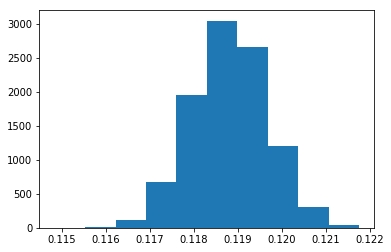

In [39]:
plt.hist(conversion_rates_new);

In [40]:
conversion_rates_new.mean()

0.11880963113343884

In [41]:
conversion_rates_new.std()

0.00085319682672607255

In [42]:
null_vals_new = np.random.normal(0, conversion_rates_new.std(), conversion_rates_new.size)

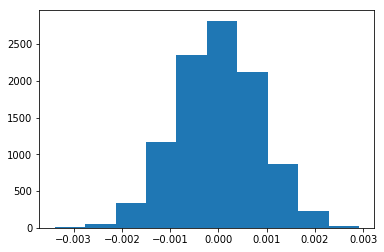

In [43]:
plt.hist(null_vals_new);

The **conversion rate** for $p_{new}$ under the null-distribution is the mean of null_vals_new:

In [44]:
null_vals_new.mean()

-5.9700174798819934e-06

In [45]:
pvalue_new = (null_vals_new > conversion_rate_df2).mean()
pvalue_new

0.0

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [46]:
conversion_rates_old = []
for _ in range(10000):
    sample = df2_control.sample(df2_control_nouser, replace = True)
    conversion_rate = sample.converted.mean()
    conversion_rates_old.append(conversion_rate)

In [47]:
conversion_rates_old = np.array(conversion_rates_old)

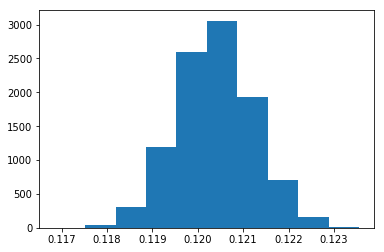

In [48]:
plt.hist(conversion_rates_old);

In [49]:
conversion_rates_old.mean()


0.12038794071891737

In [50]:
conversion_rates_old.std()

0.00084931831208857444

In [51]:
null_vals_old = np.random.normal(0, conversion_rates_old.std(), conversion_rates_old.size)

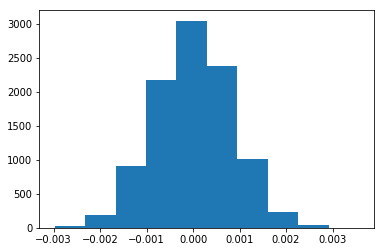

In [52]:
plt.hist(null_vals_old);

The **conversion rate** for $p_{old}$ under the null-distribution is the mean of null_vals_old:

In [53]:
null_vals_old.mean()

5.4158342306403448e-06

In [54]:
pvalue__old = (null_vals_old > conversion_rate_df2).mean()
pvalue__old

0.0

c. What is $n_{new}$, the number of individuals in the treatment group?

$n_{new}$ is stored in the variable df2_treatment_nouser:

In [55]:
n_new = df2_treatment_nouser
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

$n_{old}$ is stored in the variable df2_control_nouser:

In [56]:
n_old = df2_control_nouser
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [66]:
new_page_converted = np.random.choice([0,1], n_new, [1-conversion_rate_treatmentgroup, conversion_rate_treatmentgroup])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [67]:
old_page_converted = np.random.choice([0,1], n_old, [1-conversion_rate_controllgroup, conversion_rate_controllgroup])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [68]:
new_page_converted.mean() - old_page_converted.mean()

-0.00015117193436642307

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [ ]:
#code before the first review
#p_diffs = []
#for _ in range(10000):
#    sample_new = df2_treatment.sample(df2_treatment_nouser, replace = True)
#    conversion_rate_new = sample_new.converted.mean()
#    sample_old = df2_control.sample(df2_control_nouser, replace = True)
#    conversion_rate_old = sample_old.converted.mean()            
#    p_diffs.append(conversion_rate_new - conversion_rate_old)

I got two hints in the first review: <br>
+ to change dataframe which will be sampled from the rows with just old_page or new_page to the complete dataset
+ to use np.random.binomial instead of the sampling loop
When I do both, I have problems to understand the results, so I calculate my old algorithm and the two algorithms from the first review und compare the results.
<br> <br>
I know this will probably lead to another rejection, but I am not sure if I can ask this in mentor help. 
<br> <br>
I also calculate p_diffs_otherH0 für the last conclusion. I will find lateron that $H_0$ will not be rejected. I will try to find out what will be the case if we swap $H_0$ und $H_1$.

In [91]:
p_diffs_before_review = []
p_diffs = []
p_diffs_otherH0 = []
for _ in range(10000):
    sample_new_before_review = df2_treatment.sample(df2_treatment_nouser, replace = True)
    conversion_rate_new_before_review = sample_new_before_review.converted.mean()
    sample_new = df2.sample(df2_treatment_nouser, replace = True)
    conversion_rate_new = sample_new.converted.mean()
    sample_old_before_review = df2_control.sample(df2_control_nouser, replace = True)
    conversion_rate_old_before_review = sample_old_before_review.converted.mean()            
    sample_old = df2.sample(df2_control_nouser, replace = True)
    conversion_rate_old = sample_old.converted.mean()            
    p_diffs_before_review.append(conversion_rate_new_before_review - conversion_rate_old_before_review)
    p_diffs.append(conversion_rate_new - conversion_rate_old)
    p_diffs_otherH0.append(conversion_rate_old - conversion_rate_new)

The code from the review-hint, which I think understood (with help some of the articles in mentor help archive)

In [123]:
new_page_converted_binomial = np.random.binomial(df2_treatment_nouser, conversion_rate_treatmentgroup, 10000)/df2_treatment_nouser
old_page_converted_binomial = np.random.binomial(df2_control_nouser, conversion_rate_controllgroup, 10000)/df2_control_nouser
p_diffs_binomial = new_page_converted_binomial - old_page_converted_binomial

In [124]:
p_diffs = np.array(p_diffs)
p_diffs_before_review = np.array(p_diffs_before_review)
p_diffs_otherH0 = np.array(p_diffs_otherH0)
p_diffs_binomial = np.array(p_diffs_binomial)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Usually we had to transpose it under the 0-Distribution. But the $H_0$ is defined with $p_{new}$ - $p_{old}$ = 0, so we do not have to transpose.

In [125]:
p_diffs.mean()

1.5979604934436328e-06

diff_conversion_rates stores the differece in conversion-rates between new_page and old_page in the statistic.

In [126]:
diff_conversion_rates

-0.0015782389853555567

The difference in conversion_rates from the original data and the difference in conversion rates from the sampling distribution seems very low.

''

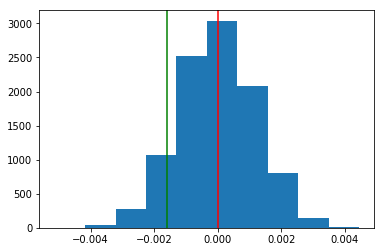

In [127]:
plt.hist(p_diffs)
plt.axvline(p_diffs.mean(), c= 'red')
plt.axvline(diff_conversion_rates, c= 'green')
;

The plot looks `normal distributed`, like expected.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [128]:
proportion__p_diffs__greater__diff_conversion_rates = (p_diffs > diff_conversion_rates).mean()
proportion__p_diffs__greater__diff_conversion_rates

0.90659999999999996

That fits with the hint from the review (and also the calculation from sm.stats.proportions_ztest). <br>
Then I compare with the calculation from the binominal calculation:

In [129]:
(p_diffs_binomial > diff_conversion_rates).mean()

0.50039999999999996

The value is far from the value in the loop calculation and far from the calculation in sm.stats.proportions_ztest. <br>
But it reminds me of the value of my old calculation, using not the whole dataset for sampling.

In [130]:
(p_diffs_before_review > diff_conversion_rates).mean()

0.50109999999999999

Sorry, I get stuck. I cannot explain the differences and do not see the mistake.

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In [131]:
pvalue = proportion__p_diffs__greater__diff_conversion_rates
pvalue

0.90659999999999996

The variable that I have named proportion__p_diffs__greater__diff_conversion_rates is the p-value.

The pvalue is the probabiltiy of observing the statistic (the data in ab_data.csv) if the null hypothesis is true.

A p-value of 0.9 is realy high (the limit of the error rate was set to 0.05), so that $H_0$ ($p_{new}$ = $p_{old}$) seems to be true, e.g. there is no statistical signicant difference between the new page and the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [132]:
import statsmodels.api as sm



/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [133]:
convert_old = df2_control_no_converted
convert_new = df2_treatment_no_converted
# n_old = #value alread exists
# n_new = #value alread exists

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

with some help from the review:

In [134]:
sm.stats.proportions_ztest([convert_new,convert_old],[n_new,n_old],alternative="larger")

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The p-values of 0.9 is far above the significance level of 0.05, so $H_0$ should not be rejected.

A significance-level of 0.05 corresponds to a confidence level of 95%. <br>
On a Website (in german; https://pro.arcgis.com/de/pro-app/tool-reference/spatial-statistics/what-is-a-z-score-what-is-a-p-value.htm) I found a relationship between a z-score and a confidence level: <br>
For a confidence interval of 95% the z-zcore shoud be < -1,96 oder > +1,96. <br>
The actual z-score is -1.3 and so the confidence level is not reached, and $H_0$ should not be rejected.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We should use a logistic regression approach, as we just have two type of outcome.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [135]:
df3 = df2.copy()

In [136]:
df3['intercept'] = 1

In [137]:
df3[['control', 'ab_page']] = pd.get_dummies(df['group'])

In [138]:
#I will need the control-Attribute later, so I do not drop anymore
#df3.drop('control', axis ='columns', inplace = True);

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [139]:
import statsmodels.api as sm

In [140]:
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,1,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,1,0


In [141]:
log_m = sm.Logit(df3['converted'], df3[['intercept', 'ab_page']])

In [142]:
results=log_m.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [143]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-08-05 23:35 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The p-value 0.1899, also much above the signifcance level of 0.05.

Although I did not find it in the documentation, the regression modell probably uses a two-sided test whereas in Part II we used a one-sided test.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

If the web-site is an international web site, one interesting other factor might be the cultural willingness or/and the individual willingness to pay for content. 

Concerning cultural willingness: In Europe, e.g., there seems not so much cultural willingness to pay for content than in America, because people are used to get content for free. So infomation about the residence of the user could help.

Concerning individual willingness: if there would be information about the income class of the user that would help.

If the additional terms are not independent from each other, they might bias the coefficient an the p-value. Too many additinal terms could weaken the modell. Weak additional terms should be taken out of the modell.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [144]:
df_country = pd.read_csv('countries.csv')

In [145]:
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [146]:
df_country.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [147]:
df4 = df3.set_index('user_id').join(df_country.set_index('user_id'))

In [148]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 851104 to 715931
Data columns (total 8 columns):
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
intercept       290584 non-null int64
control         290584 non-null uint8
ab_page         290584 non-null uint8
country         290584 non-null object
dtypes: int64(2), object(4), uint8(2)
memory usage: 26.1+ MB


In [149]:
df4[['CA', 'UK', 'US']] = pd.get_dummies(df4['country'])

In [150]:
df4.head()

,timestamp,group,landing_page,converted,intercept,control,ab_page,country,CA,UK,US
user_id,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US,0,0,1
936923,2017-01-10 15:20:49.083499,control,old_page,0,1,1,0,US,0,0,1
719014,2017-01-17 01:48:29.539573,control,old_page,0,1,1,0,US,0,0,1


In [151]:
log_m_country = sm.Logit(df4['converted'], df4[['intercept', 'CA', 'UK']])

In [152]:
results_country = log_m_country.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [153]:
results_country.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-08-05 23:36 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
CA           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
UK            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
==================================================================

"""

In [154]:
np.exp(0.0099)

1.0099491671175422

In [155]:
1/np.exp(-0.0408)

1.0416437559600236

The country does not have a significant influence on the conversion rate: CA is about 0.9% higher than US, Canada about 4% lower than US, and both p-values are above 0.05.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

(with some help from the review:) <br> <br>
I take the old page in US (US_old) as baseline. <br>
Then I need the following dummy variables for the model: <br>
+ CA_old
+ UK_old
+ US_new
+ CA_new
+ UK_new

In [156]:
df5 = df4.copy()

In [158]:
df5['CA_old'] = df5['CA'] * df5['control']
df5['UK_old'] = df5['UK'] * df5['control']
df5['US_new'] = df5['US'] * df5['ab_page']
df5['CA_new'] = df5['CA'] * df5['ab_page']
df5['UK_new'] = df5['UK'] * df5['ab_page']

In [159]:
df5.head()

,timestamp,group,landing_page,converted,intercept,control,ab_page,country,CA,UK,US,CA_old,UK_old,US_new,CA_new,UK_new
user_id,,,,,,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US,0,0,1,0,0,0,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US,0,0,1,0,0,0,0,0
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US,0,0,1,0,0,0,0,0
936923,2017-01-10 15:20:49.083499,control,old_page,0,1,1,0,US,0,0,1,0,0,0,0,0
719014,2017-01-17 01:48:29.539573,control,old_page,0,1,1,0,US,0,0,1,0,0,0,0,0


In [160]:
log_m__page_country = sm.Logit(df5['converted'], df5[['intercept', 'CA_old', 'UK_old', 'US_new', 'CA_new', 'UK_new']])

In [161]:
results__page_country = log_m__page_country.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [162]:
results__page_country.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-08-05 23:37 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
CA_old       -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK_old       -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
US_new       -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
CA_new       -0.0850    0.0384    -2.2157  0.0267  -0.1601  -0.0098
UK_new        0.0051    0.0188     0.2710  0.7864  -0.0317   0.0419
==================================================================

"""

In [163]:
#CA_old
1/np.exp(-0.0175)

1.0176540221507617

In [164]:
#UK_old
1/np.exp(-0.0057)

1.0057162759095335

In [165]:
#US_new
1/np.exp(-0.0206)

1.0208136445037459

In [166]:
#CA_new
1/np.exp(-0.0850)

1.0887170666983987

In [167]:
#UK_new
np.exp(0.0051)

1.005113027136717

Compared to the old page in US, all other combinations of page and country execpt the new page in UK seem to have lower conversion rates than the old page in US (new page in UK seems to have nearly the same). <br> But all this has no statistical relevance, as the p-value ist higher than 0.05; only the new page in Canada has a p-value under the significance-level of 0.05 (0.0267), where the conversion rate of the new page ist 8% lower than the old page in US.

### Ohter Calcualtions

What will happen if we swap $H_0$ und $H_1$: <br>
$H_{0other}: p_{old} - p_{new} <= 0$: The Probability of $p_{old}$ is the same or less than $p_{new}$.<br>
$H_{1other}: p_{old} - p_{new} > 0 $: The Probability of $p_{old}$ is bigger than $p_{new}$.

The simulation for $H_{0other}$ is stored in p_diffs_otherH0.
What proportion of the p_diffs_otherH0 are greater than the actual difference observed in ab_data.csv?

In [168]:
diff_conversion_rates_other = conversion_rate_controllgroup - conversion_rate_treatmentgroup
diff_conversion_rates_other

0.0015782389853555567

In [169]:
(p_diffs_otherH0 > diff_conversion_rates_other).mean()

0.093399999999999997

The p-value for $H_{0other}$ (0.09) is above 0.05, so we also cannot reject $H_{0other}$, and take $H_{1other}$.

Let's check whith the z-test:

In [170]:
sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new],alternative="larger")

(1.3109241984234394, 0.094941687240975514)

The z-test does agree. The p-value is higher than 0.05, and the z-score does not show a confidece lever near 95%.

### Conclusion

Due to hypothesis testing, neither the orginal $H_0$ nor swapped $H_{0other}$ could be rejected, so we have a kind of stalemate.
<br>
Du to regession test, neither old or new page, no the country nor combinations seem to have a significant statistical influence to the conversion rate. <br> <br>
It seems that one or more other - at the moment unknown - influence factor(s) are responsible for the decision of conversion. <br>


There has to be made a decision if the company will develop the old or the new page further. <br> <br>
Therefore I would take other points into consideration, as the higher and/or more modern technical standard of a page, a more modern layout, devloping costs etc., to be prepared for coming changes on the web page.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])